In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

### Training Data

C:\Users\LightSpeed\anaconda3\envs\gpu\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


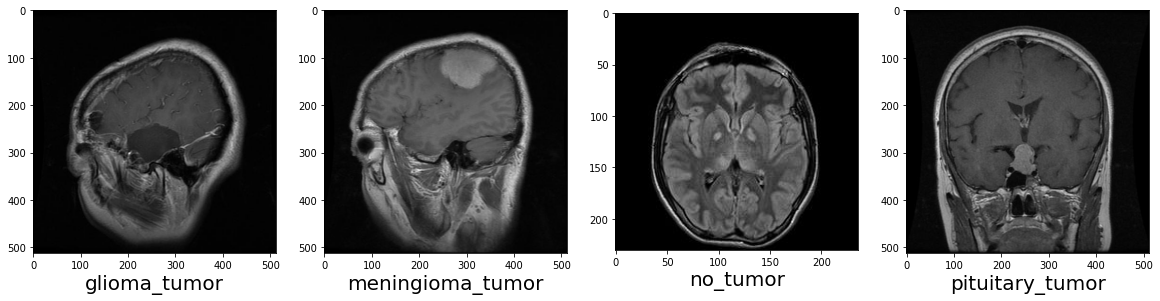

In [2]:
datadir = 'C:/Users/LightSpeed/Light Speed/Deep Learning/Brain Tumor Classification MRI/Training'
categories = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
train_images = []
train_labels = []

plt.figure(figsize=(20,80))

for category in categories:
    first_in_this = True
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        
        if first_in_this ==True:
            plt.subplot(1,4,categories.index(category)+1)
            plt.imshow(img_array)
            plt.xlabel(category,size=20)
        
        img_array = cv2.resize(img_array,(70,70) )
        train_images.append(img_array)
        train_labels.append(categories.index(category))

In [3]:
len(train_images),len(train_labels)

(2870, 2870)

In [4]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
train_images.shape[1:], train_labels.shape

((70, 70, 3), (2870,))

In [5]:
train_images = train_images/255.0

### Testing Data

In [6]:
datadir = os.path.normpath('C:/Users/LightSpeed/Light Speed/Deep Learning/Brain Tumor Classification MRI/Testing')
categories = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
test_images = []
test_labels = []
for category in categories:
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        img_array = cv2.resize(img_array,(70,70) )
        test_images.append(img_array)
        test_labels.append(categories.index(category))

In [7]:
len(test_images),len(test_labels)

(394, 394)

In [8]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_images.shape[1:], test_labels.shape

((70, 70, 3), (394,))

In [9]:
test_images = test_images/255.0

### Building a base CNN model on 70 * 70 pixelated images

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from tensorflow.python.keras.layers import Conv2D,MaxPooling2D
from tensorflow.python.keras import regularizers

from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers

In [12]:
weight_decay = 1e-4
model = Sequential()

#1st Convolutional Layer
model.add(Conv2D(32,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay) ,input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#2nd Convolutional Layer
model.add(Conv2D(64,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#3rd Convolutional Layer
model.add(Conv2D(128,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#4th Convolutional Layer
model.add(Conv2D(256,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#5th Convolutional Layer
model.add(Conv2D(512,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#6th Convolutional Layer
model.add(Conv2D(1024,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#Fully connected layer
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(4,activation='softmax'))

In [13]:
sgd = keras.optimizers.SGD(0.1)

model.compile(optimizer=sgd,
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
model.fit(train_images,train_labels,
         epochs=100,
         validation_data=(test_images,test_labels))

Epoch 1/100
90/90 [==============================] - 6s 63ms/step - loss: 1.5486 - accuracy: 0.3962 - val_loss: 2.3251 - val_accuracy: 0.2056
Epoch 2/100
90/90 [==============================] - 4s 41ms/step - loss: 1.3054 - accuracy: 0.4777 - val_loss: 2.8805 - val_accuracy: 0.2665
Epoch 3/100
90/90 [==============================] - 4s 40ms/step - loss: 1.2534 - accuracy: 0.4934 - val_loss: 3.6216 - val_accuracy: 0.2614
Epoch 4/100
90/90 [==============================] - 4s 41ms/step - loss: 1.2604 - accuracy: 0.4850 - val_loss: 2.3601 - val_accuracy: 0.3096
Epoch 5/100
90/90 [==============================] - 4s 40ms/step - loss: 1.2340 - accuracy: 0.5098 - val_loss: 3.6501 - val_accuracy: 0.2107
Epoch 6/100
90/90 [==============================] - 4s 39ms/step - loss: 1.1679 - accuracy: 0.5495 - val_loss: 3.0507 - val_accuracy: 0.2919
Epoch 7/100
90/90 [==============================] - 3s 39ms/step - loss: 1.1551 - accuracy: 0.5505 - val_loss: 2.4722 - val_accuracy: 0.3122
Epoch 

### Tuning 70*70 CNN model

In [55]:
def build_model3(hp):
    try:
        weight_decay = 1e-4
        model = Sequential()
        model.add(Conv2D(32,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay) ,input_shape=train_images.shape[1:]))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(0.4))

        for i in range(5,hp.Int('Number_Of_Conv_Layers',min_value=6,max_value=12)):
            model.add(Conv2D((2**i),(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding=hp.Choice('padding'+str(i),['valid','same'])))
            model.add(Activation('relu'))
            model.add(BatchNormalization())
            model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Dropout(hp.Choice('Dropout'+str(i),[0.1,0.2,0.3,0.4,0.5])))


        model.add(Flatten())
        model.add(Dense(32,activation='relu'))
        model.add(Dropout(0.4))
        model.add(Dense(4,activation='softmax'))

        model.compile(optimizer=sgd,
                 loss = 'sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
        return model
    except:
        weight_decay = 1e-4
        model = Sequential()
        model.add(Conv2D(32,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay) ,input_shape=train_images.shape[1:]))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(0.4))

        for i in range(5,hp.Int('Number_Of_Conv_Layers',min_value=6,max_value=12)):
            model.add(Conv2D((2**i),(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding=hp.Choice('padding'+str(i),['valid','same'])))
            model.add(Activation('relu'))
            model.add(BatchNormalization())
            #model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Dropout(hp.Choice('Dropout'+str(i),[0.1,0.2,0.3,0.4,0.5])))


        model.add(Flatten())
        model.add(Dense(32,activation='relu'))
        model.add(Dropout(0.4))
        model.add(Dense(4,activation='softmax'))

        model.compile(optimizer=sgd,
                 loss = 'sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
        return model

In [56]:
tuner3 = RandomSearch(
    build_model3,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory=os.path.normpath('C:/'),
    project_name='Hyp_cnn_kaggle3')

In [57]:
tuner3.search(train_images, train_labels,epochs=100,validation_data=(test_images,test_labels))

Trial 10 Complete [00h 35m 58s]
val_accuracy: 0.25380709767341614

Best val_accuracy So Far: 0.7715736031532288
Total elapsed time: 02h 13m 38s
INFO:tensorflow:Oracle triggered exit


In [75]:
best_model = tuner3.get_best_models(1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 70, 70, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 70, 70, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 35, 35, 32)        0

In [76]:
best_model.evaluate(test_images,test_labels)

13/13 [==============================] - 0s 7ms/step - loss: 2.3654 - accuracy: 0.7716


[2.3654427528381348, 0.7715736031532288]

In [78]:
yprob_test = best_model.predict(test_images)
ypred_test = [np.argmax(i) for i in yprob_test]

[[ 22  41  30   7]
 [  1 113   1   0]
 [  0   0 105   0]
 [  0   4   6  64]]


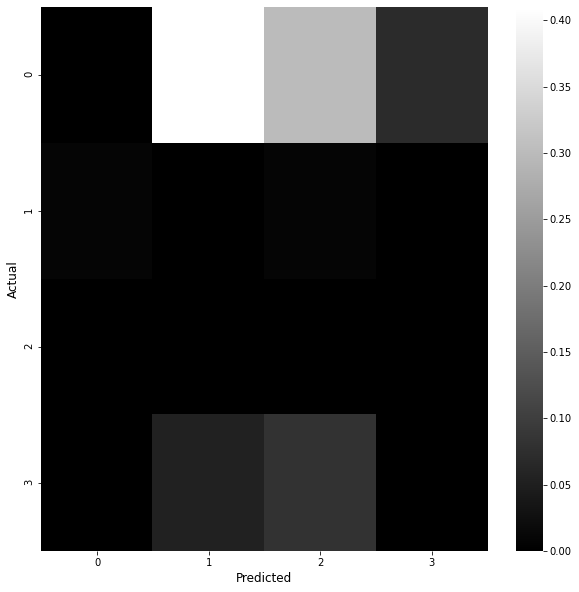

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mx = confusion_matrix(test_labels, ypred_test)
print(conf_mx)
plt.figure(figsize=(10,10))

row_sums = conf_mx.sum(axis=1,keepdims=True)
error_conf_mx = conf_mx/row_sums
np.fill_diagonal(error_conf_mx,0)

sns.heatmap(error_conf_mx, cmap=plt.cm.gray)
plt.xlabel('Predicted',size=12)
plt.ylabel('Actual',size=12)
plt.show()

In [28]:
categories

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

### We see that most of the miss classification can be attributed to :
        Actual Class 0 -----> Model Predicting as Class 1

In [98]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, ypred_test))

              precision    recall  f1-score   support

           0       0.96      0.22      0.36       100
           1       0.72      0.98      0.83       115
           2       0.74      1.00      0.85       105
           3       0.90      0.86      0.88        74

    accuracy                           0.77       394
   macro avg       0.83      0.77      0.73       394
weighted avg       0.82      0.77      0.72       394



### Even from the Classification Report we can see that our model is doing a bad job at predicting Class 0 (f1=0.36) as compared to other Classes which the model is predicting pretty good

### Data Augmentation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [3]:
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        fill_mode='nearest')
datadir = 'C:/Users/LightSpeed/Light Speed/Deep Learning/Brain Tumor Classification MRI/Augmented Training'
categories = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

for category in categories:
    path = os.path.join(datadir,category)
    for image in os.listdir(path):
        img = load_img(os.path.join(path,image))
        x = img_to_array(img)
        x = x.reshape((1,)+x.shape)
        i=0
        for batch in datagen.flow(x,batch_size=1,save_to_dir=path,save_prefix=category,save_format='jpg'):
            i += 1
            if i>20:
                break

### Augmented Training Data

In [5]:
datadir = 'C:/Users/LightSpeed/Light Speed/Deep Learning/Brain Tumor Classification MRI/Augmented Training'
categories = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
train_images = []
train_labels = []
for category in categories:
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        img_array = cv2.resize(img_array,(100,100) )
        train_images.append(img_array)
        train_labels.append(categories.index(category))

In [6]:
len(train_images),len(train_labels)

(33242, 33242)

In [7]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
train_images.shape[1:], train_labels.shape

((100, 100, 3), (33242,))

In [8]:
train_images = train_images/255.0

### Augmented Testing Data

In [9]:
datadir = os.path.normpath('C:/Users/LightSpeed/Light Speed/Deep Learning/Brain Tumor Classification MRI/Testing')
categories = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
test_images = []
test_labels = []
for category in categories:
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        img_array = cv2.resize(img_array,(100,100) )
        test_images.append(img_array)
        test_labels.append(categories.index(category))

In [10]:
len(test_images),len(test_labels)

(394, 394)

In [11]:
test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_images.shape[1:], test_labels.shape

((100, 100, 3), (394,))

In [12]:
test_images = test_images/255.0

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from tensorflow.python.keras.layers import Conv2D,MaxPooling2D
from tensorflow.python.keras import regularizers

from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers

In [14]:
weight_decay = 1e-4
model = Sequential()

#1st Convolutional Layer
model.add(Conv2D(32,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay) ,input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#2nd Convolutional Layer
model.add(Conv2D(64,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#3rd Convolutional Layer
model.add(Conv2D(128,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#4th Convolutional Layer
model.add(Conv2D(256,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#5th Convolutional Layer
model.add(Conv2D(512,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#6th Convolutional Layer
model.add(Conv2D(1024,(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#Fully connected layer
model.add(Flatten())
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(4,activation='softmax'))

In [15]:
sgd = keras.optimizers.SGD(0.1)

model.compile(optimizer=sgd,
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [14]:
model.fit(train_images,train_labels,
         epochs=100,
         validation_data=(test_images,test_labels))

Epoch 1/100
1039/1039 [==============================] - 62s 59ms/step - loss: 1.3482 - accuracy: 0.5880 - val_loss: 2.5717 - val_accuracy: 0.2563
Epoch 2/100
1039/1039 [==============================] - 56s 54ms/step - loss: 0.9676 - accuracy: 0.6989 - val_loss: 2.0416 - val_accuracy: 0.3959
Epoch 3/100
1039/1039 [==============================] - 57s 55ms/step - loss: 0.7997 - accuracy: 0.7758 - val_loss: 1.8207 - val_accuracy: 0.4695
Epoch 4/100
1039/1039 [==============================] - 57s 55ms/step - loss: 0.6880 - accuracy: 0.8219 - val_loss: 2.6344 - val_accuracy: 0.3934
Epoch 5/100
1039/1039 [==============================] - 58s 55ms/step - loss: 0.6106 - accuracy: 0.8511 - val_loss: 2.9108 - val_accuracy: 0.4924
Epoch 6/100
1039/1039 [==============================] - 58s 55ms/step - loss: 0.5626 - accuracy: 0.8740 - val_loss: 2.2826 - val_accuracy: 0.5609
Epoch 7/100
1039/1039 [==============================] - 58s 56ms/step - loss: 0.5137 - accuracy: 0.8922 - val_loss: 2

In [15]:
yprob_train = model.predict(train_images)
ypred_train = [np.argmax(i) for i in yprob_train]

yprob_test = model.predict(test_images)
ypred_test = [np.argmax(i) for i in yprob_test]

In [16]:
from sklearn.metrics import confusion_matrix

conf_mx_train = confusion_matrix(train_labels, ypred_train)
print(conf_mx_train)
print('*************************************************')
conf_mx_test = confusion_matrix(test_labels, ypred_test)
print(conf_mx_test)

[[9068    1    0   56]
 [  15 8885    5  113]
 [   1    1 5968   57]
 [  12    0    0 9060]]
*************************************************
[[ 26  44  28   2]
 [  0 113   2   0]
 [  1   0 102   2]
 [  0   0   6  68]]


### Tuning The model

In [15]:
sgd = keras.optimizers.SGD(0.1)
def build_model_augmented(hp):
    try:
        weight_decay = 1e-4
        model = Sequential()
        model.add(Conv2D(32,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay) ,input_shape=train_images.shape[1:]))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(0.4))

        for i in range(5,hp.Int('Number_Of_Conv_Layers',min_value=6,max_value=10)):
            model.add(Conv2D((2**i),(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
            model.add(Activation('relu'))
            model.add(BatchNormalization())
            model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Dropout(hp.Choice('Dropout'+str(i),[0.1,0.2,0.3,0.4,0.5])))


        model.add(Flatten())
        
        for i in range(hp.Int('Number_Of_Hidden_Layers',min_value=1,max_value=10)):
            model.add(Dense(hp.Int('Number_Of_Hidden_Nuerons'+str(i),min_value=500,max_value=10000,step=500),activation='relu'))
            model.add(Dropout(0.4))
        
        model.add(Dense(4,activation='softmax'))
        model.compile(optimizer=sgd,
                 loss = 'sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
        return model
    except:
        weight_decay = 1e-4
        model = Sequential()
        model.add(Conv2D(32,(3,3),padding='same',kernel_regularizer=regularizers.l2(weight_decay) ,input_shape=train_images.shape[1:]))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2,2)))
        model.add(Dropout(0.4))

        for i in range(5,hp.Int('Number_Of_Conv_Layers',min_value=6,max_value=12)):
            model.add(Conv2D((2**i),(3,3), kernel_regularizer=regularizers.l2(weight_decay) , padding='same'))
            model.add(Activation('relu'))
            model.add(BatchNormalization())
            #model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Dropout(hp.Choice('Dropout'+str(i),[0.1,0.2,0.3,0.4,0.5])))


        model.add(Flatten())
        for i in range(hp.Int('Number_Of_Hidden_Layers',min_value=1,max_value=10)):
            model.add(Dense(hp.Int('Number_Of_Hidden_Nuerons'+str(i),min_value=500,max_value=10000,step=500),activation='relu'))
            model.add(Dropout(0.4))
        
        model.add(Dense(4,activation='softmax'))
        model.compile(optimizer=sgd,
                 loss = 'sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
        return model

In [16]:
tuner_aug = RandomSearch(
    build_model_augmented,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory=os.path.normpath('C:/'),
    project_name='Hyp_cnn_aug')

INFO:tensorflow:Reloading Oracle from existing project C:\Hyp_cnn_aug\oracle.json
INFO:tensorflow:Reloading Tuner from C:\Hyp_cnn_aug\tuner0.json


In [14]:
tuner_aug.search(train_images, train_labels,epochs=100,validation_data=(test_images,test_labels))


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
Number_Of_Conv_...|6                 |9                 
Dropout5          |0.5               |0.5               
Number_Of_Hidde...|9                 |4                 
Number_Of_Hidde...|7500              |3500              
Dropout6          |0.1               |0.1               
Dropout7          |0.2               |0.3               
Number_Of_Hidde...|6500              |3000              
Number_Of_Hidde...|6500              |500               
Number_Of_Hidde...|5000              |1000              
Number_Of_Hidde...|9500              |3500              
Number_Of_Hidde...|7000              |4000              
Number_Of_Hidde...|8000              |1500              
Dropout8          |0.4               |0.2               
Dropout9          |0.1               |0.2               
Number_Of_Hidde...|8000              |2000              
Number_Of_Hidde...|7000              |9000              
Numb

Traceback (most recent call last):
  File "C:\Users\LightSpeed\anaconda3\envs\gpu\lib\site-packages\kerastuner\engine\hypermodel.py", line 104, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-12-dca8b78e3b1e>", line 51, in build_model_augmented
    model.add(Dense(hp.Int('Number_Of_Hidden_Nuerons'+str(i),min_value=500,max_value=10000,step=500),activation='relu'))
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\training\tracking\base.py", line 457, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py", line 221, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\base_layer.py", line 926, in __call__
    input_list)
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensor

Invalid model 0/5


Traceback (most recent call last):
  File "<ipython-input-12-dca8b78e3b1e>", line 23, in build_model_augmented
    model.add(Dense(hp.Int('Number_Of_Hidden_Nuerons'+str(i),min_value=500,max_value=10000,step=500),activation='relu'))
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\training\tracking\base.py", line 457, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py", line 221, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\base_layer.py", line 926, in __call__
    input_list)
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\base_layer.py", line 1098, in _functional_construction_call
    self._maybe_build(inputs)
  File "C:\Users\LightSpeed\AppData\Roami

Invalid model 1/5


Traceback (most recent call last):
  File "C:\Users\LightSpeed\anaconda3\envs\gpu\lib\site-packages\kerastuner\engine\hypermodel.py", line 104, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-12-dca8b78e3b1e>", line 51, in build_model_augmented
    model.add(Dense(hp.Int('Number_Of_Hidden_Nuerons'+str(i),min_value=500,max_value=10000,step=500),activation='relu'))
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\training\tracking\base.py", line 457, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py", line 221, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\base_layer.py", line 926, in __call__
    input_list)
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensor

Invalid model 2/5


Traceback (most recent call last):
  File "C:\Users\LightSpeed\anaconda3\envs\gpu\lib\site-packages\kerastuner\engine\hypermodel.py", line 104, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-12-dca8b78e3b1e>", line 51, in build_model_augmented
    model.add(Dense(hp.Int('Number_Of_Hidden_Nuerons'+str(i),min_value=500,max_value=10000,step=500),activation='relu'))
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\training\tracking\base.py", line 457, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py", line 221, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\base_layer.py", line 926, in __call__
    input_list)
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensor

Invalid model 3/5


Traceback (most recent call last):
  File "C:\Users\LightSpeed\anaconda3\envs\gpu\lib\site-packages\kerastuner\engine\hypermodel.py", line 104, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-12-dca8b78e3b1e>", line 51, in build_model_augmented
    model.add(Dense(hp.Int('Number_Of_Hidden_Nuerons'+str(i),min_value=500,max_value=10000,step=500),activation='relu'))
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\training\tracking\base.py", line 457, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py", line 221, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\base_layer.py", line 926, in __call__
    input_list)
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensor

Invalid model 4/5


Traceback (most recent call last):
  File "C:\Users\LightSpeed\anaconda3\envs\gpu\lib\site-packages\kerastuner\engine\hypermodel.py", line 104, in build
    model = self.hypermodel.build(hp)
  File "<ipython-input-12-dca8b78e3b1e>", line 51, in build_model_augmented
    model.add(Dense(hp.Int('Number_Of_Hidden_Nuerons'+str(i),min_value=500,max_value=10000,step=500),activation='relu'))
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\training\tracking\base.py", line 457, in _method_wrapper
    result = method(self, *args, **kwargs)
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\sequential.py", line 221, in add
    output_tensor = layer(self.outputs[0])
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\base_layer.py", line 926, in __call__
    input_list)
  File "C:\Users\LightSpeed\AppData\Roaming\Python\Python36\site-packages\tensor

Invalid model 5/5


RuntimeError: Too many failed attempts to build model.

In [17]:
best_model = tuner_aug.get_best_models(1)[0]
best_model.evaluate(test_images,test_labels)

13/13 [==============================] - 0s 17ms/step - loss: 1.6572 - accuracy: 0.8071


[1.657168984413147, 0.807106614112854]

In [18]:
yprob_train = best_model.predict(train_images)
ypred_train = [np.argmax(i) for i in yprob_train]

yprob_test = best_model.predict(test_images)
ypred_test = [np.argmax(i) for i in yprob_test]

In [19]:
from sklearn.metrics import confusion_matrix

conf_mx_train = confusion_matrix(train_labels, ypred_train)
print('Training Confusion Matrix:')
print(conf_mx_train)
print()
print('*************************************************\n')
print('Testing Confusion Matrix:')
conf_mx_test = confusion_matrix(test_labels, ypred_test)
print(conf_mx_test)

Training Confusion Matrix:
[[9110    0    0   15]
 [ 555 7906   15  542]
 [  37    4 5952   34]
 [  34    0    0 9038]]

*************************************************

Testing Confusion Matrix:
[[ 38  33  26   3]
 [  1 111   1   2]
 [  1   0 103   1]
 [  0   2   6  66]]


In [22]:
33/146, 26/136

(0.22602739726027396, 0.19117647058823528)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, ypred_test))

              precision    recall  f1-score   support

           0       0.95      0.38      0.54       100
           1       0.76      0.97      0.85       115
           2       0.76      0.98      0.85       105
           3       0.92      0.89      0.90        74

    accuracy                           0.81       394
   macro avg       0.85      0.80      0.79       394
weighted avg       0.84      0.81      0.78       394



### Analysing Model results
    1) If the model is predicting the patient to have Glioma, the probability of the model being right is 95%.
    2) If the model is predicting the patient to have Meningioma, the model was right 76% of times while nearly 
       23% of times the patient actually had Glioma
    3) The same is the case when the model is predicting that the patient has no tumor, it is right only 75% of
       times while 19% of times the patients actually had Glioma
    4) The model is doing a good job at predicting Pituitary tumors (~92% Precision)
    
    Where is the model going wrong?
    --> The model is able to predict whether the given brain mri image has tumor or not. However, the model is 
        performing pretty badly when prediting actual cases with Glioma (only 38% of times). As noted in the 2nd
        point above, the model is predicting Meningioma 23% of times and No tumor 20% of times while in fact the 
        patient has Glioma